In [1]:
from numba import cuda
import time
import numpy as np
import networkx as nx
from scipy.sparse import csgraph
import matplotlib.pyplot as plt
from tqdm import tqdm

import sys
sys.path.append('..')

from graphcuda import generate_random_adjacency_matrix, floyd_warshall_gpu

cuda.gpus

c:\Users\Anderson\miniconda3\envs\gnn\lib\site-packages\scipy\__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Comparing NetworkX, SciPy, and custom Numba CUDA implementations of Floyd-Warshall

### Parameters

In [2]:
N = np.arange(100, 1000, 100, dtype=int)
prob_edge = 1.2/(100-1)

nx_times = []
scipy_times = []
gpu_times = []

nx_results = []
scipy_results = []
gpu_results = []

for n in tqdm(N, position=0, desc='N', leave=False, ncols=80):
    adjacency_matrix = generate_random_adjacency_matrix(n, prob_edge)

    # NetworkX
    g = nx.from_numpy_array(adjacency_matrix)
    start = time.perf_counter()
    nx_fw = nx.floyd_warshall(g, weight='weight')
    end = time.perf_counter()
    nx_times.append(end - start)
    nx_results.append(nx_fw)

    # SciPy
    start = time.perf_counter()
    scipy_fw = csgraph.floyd_warshall(adjacency_matrix)
    end = time.perf_counter()
    scipy_times.append(end - start)
    scipy_results.append(scipy_fw)

    # Numba CUDA
    start = time.perf_counter()
    gpu_fw = floyd_warshall_gpu(adjacency_matrix, matrix_block_size=4)
    end = time.perf_counter()
    gpu_times.append(end - start)
    gpu_results.append(gpu_fw)

### Verify Correctness of Numba Result
- I only compare SciPy and Numba's results because NetworkX produces a different format
- NetworkX's and SciPy's should be identical

In [4]:
for i, n in tqdm(enumerate(N)):
    print(f'N={n}, Correct? {np.allclose(scipy_results[i], gpu_results[i])}')

9it [00:00, 200.00it/s]

N=100, Correct? True
N=200, Correct? True
N=300, Correct? True
N=400, Correct? True
N=500, Correct? True
N=600, Correct? True
N=700, Correct? True
N=800, Correct? True
N=900, Correct? True


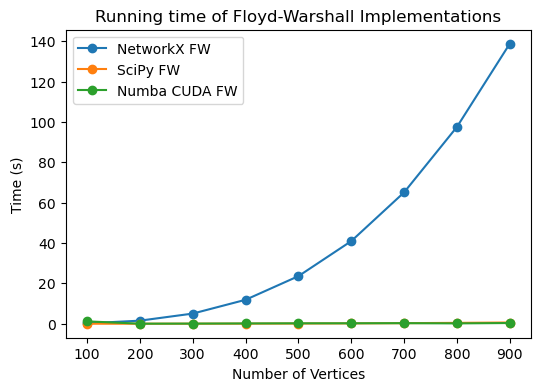

In [26]:
plt.figure(figsize=(6, 4))
plt.plot(N, nx_times, '-o', label='NetworkX FW')
plt.plot(N, scipy_times, '-o', label='SciPy FW')
plt.plot(N, gpu_times, '-o', label='Numba CUDA FW')
plt.title("Running time of Floyd-Warshall Implementations")
plt.xlabel("Number of Vertices")
plt.ylabel('Time (s)')
plt.legend()
plt.savefig('./figures/fw_times.png', dpi=300)

### Speedup from NetworkX

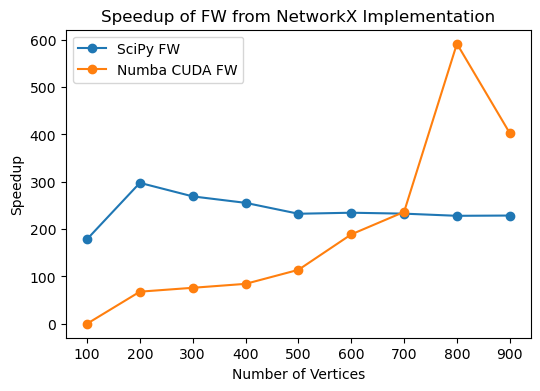

In [25]:
plt.figure(figsize=(6, 4))
plt.plot(N, np.divide(nx_times, scipy_times), '-o', label='SciPy FW')
plt.plot(N, np.divide(nx_times, gpu_times), '-o', label='Numba CUDA FW')
plt.title("Speedup of FW from NetworkX Implementation")
plt.xlabel("Number of Vertices")
plt.ylabel('Speedup')
plt.legend()
plt.savefig('./figures/speedup_networkx.png', dpi=300)

## Comparing SciPy and Numba CUDA implementations

In [7]:
N = np.arange(100, 5000, 100, dtype=int)
prob_edge = 1.2/(100-1)

scipy_times_2 = []
gpu_times_2 = []

scipy_results_2 = []
gpu_results_2 = []

for n in tqdm(N, position=0, desc='N', leave=False, ncols=80):
    adjacency_matrix = generate_random_adjacency_matrix(n, prob_edge)

    # SciPy
    start = time.perf_counter()
    scipy_fw = csgraph.floyd_warshall(adjacency_matrix)
    end = time.perf_counter()
    scipy_times_2.append(end - start)
    scipy_results_2.append(scipy_fw)

    # Numba CUDA
    start = time.perf_counter()
    gpu_fw = floyd_warshall_gpu(adjacency_matrix, matrix_block_size=4)
    end = time.perf_counter()
    gpu_times_2.append(end - start)
    gpu_results_2.append(gpu_fw)

### Verify Correctness

In [11]:
for i, n in enumerate(N):
    print(f'N={n}, Correct? {np.allclose(scipy_results_2[i], gpu_results_2[i])}')

N=100, Correct? True
N=200, Correct? True
N=300, Correct? True
N=400, Correct? True
N=500, Correct? True
N=600, Correct? True
N=700, Correct? True
N=800, Correct? True
N=900, Correct? True
N=1000, Correct? True
N=1100, Correct? True
N=1200, Correct? True
N=1300, Correct? True
N=1400, Correct? True
N=1500, Correct? True
N=1600, Correct? True
N=1700, Correct? True
N=1800, Correct? True
N=1900, Correct? True
N=2000, Correct? True
N=2100, Correct? True
N=2200, Correct? True
N=2300, Correct? True
N=2400, Correct? True
N=2500, Correct? True
N=2600, Correct? True
N=2700, Correct? True
N=2800, Correct? True
N=2900, Correct? True
N=3000, Correct? True
N=3100, Correct? True
N=3200, Correct? True
N=3300, Correct? True
N=3400, Correct? True
N=3500, Correct? True
N=3600, Correct? True
N=3700, Correct? True
N=3800, Correct? True
N=3900, Correct? True
N=4000, Correct? True
N=4100, Correct? True
N=4200, Correct? True
N=4300, Correct? True
N=4400, Correct? True
N=4500, Correct? True
N=4600, Correct? Tr

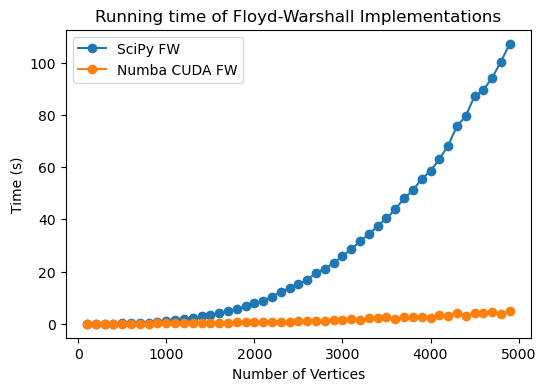

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(N, scipy_times_2, '-o', label='SciPy FW')
plt.plot(N, gpu_times_2, '-o', label='Numba CUDA FW')
plt.title("Running time of Floyd-Warshall Implementations")
plt.xlabel("Number of Vertices")
plt.ylabel('Time (s)')
plt.legend()
plt.savefig('./figures/scipy_vs_numba_time.png', dpi=300)

### Speedup from SciPy

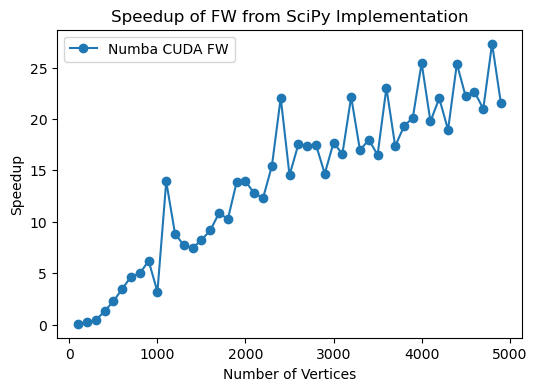

In [21]:
plt.figure(figsize=(6, 4))
plt.plot(N, np.divide(scipy_times_2, gpu_times_2), '-o', label='Numba CUDA FW')
plt.title("Speedup of FW from SciPy Implementation")
plt.xlabel("Number of Vertices")
plt.ylabel('Speedup')
plt.legend()
plt.savefig('./figures/scipy_vs_numba_speedup.png', dpi=300)